In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
# encoder_df = pd.read_pickle("/work/aistwal/MMDS_MasterThesis/data/tau2019/tau2019_encoder_data/tau_2019_conv_autoencoder_200_25.pkl")
encoder_df = pd.read_pickle("/work/aistwal/MMDS_MasterThesis/data/tau2019/tau2019_encoder_data/tau_2019_conv_autoencoder_50_10.pkl")

In [3]:
encoder_df

Label                                     Encoder Output
0                airport  [979.00555, 1315.8931, 1674.273, 2150.1726, 97...
1                    bus  [813.42163, 1309.7639, 1829.5267, 2345.505, 84...
2          shopping_mall  [1309.5095, 1663.2076, 2130.7615, 2628.9846, 1...
3      street_pedestrian  [1382.9443, 1703.7753, 2095.646, 2582.293, 143...
4      street_pedestrian  [1347.6736, 1669.3535, 2136.009, 2587.6548, 14...
...                  ...                                                ...
14395               tram  [1617.7244, 2142.737, 2307.518, 2522.0857, 165...
14396               tram  [1557.2258, 2031.3154, 2378.7266, 2794.788, 15...
14397               tram  [746.95306, 1363.7922, 1751.8524, 2061.959, 86...
14398               tram  [1126.7748, 1709.415, 2173.319, 2466.2239, 110...
14399               tram  [1078.9458, 1619.8718, 1875.5189, 2094.905, 11...

[14400 rows x 2 columns]

In [4]:
print(type(encoder_df['Encoder Output'][0]))
encoder_df['Encoder Output'][0].size

<class 'numpy.ndarray'>


1600

In [5]:
# 14400 rows are a lot to analyse hence, shuffle the dataframe and take only 1000 values
df = encoder_df.sample(frac = 0.7).reset_index(drop=True)


In [6]:
df

Label                                     Encoder Output
0          metro_station  [1684.7408, 2035.6436, 2271.1533, 2508.527, 16...
1                   park  [1629.8064, 1924.298, 2158.556, 2617.7878, 164...
2                  metro  [1411.4548, 1947.4507, 2331.6777, 2685.0786, 1...
3                   park  [1468.5588, 2016.4265, 2488.235, 2772.3943, 14...
4                   tram  [1066.6611, 1369.9282, 1819.3638, 2458.5837, 1...
...                  ...                                                ...
10075                bus  [926.4929, 1442.2395, 1695.0331, 2092.4236, 92...
10076      public_square  [1286.5786, 1778.6101, 2061.0903, 2503.5825, 1...
10077                bus  [1460.0277, 1937.5107, 2180.9878, 2517.8386, 1...
10078      metro_station  [1297.5275, 1706.3865, 1989.6858, 2350.1165, 1...
10079  street_pedestrian  [1569.1362, 1884.1013, 2391.699, 2795.6785, 15...

[10080 rows x 2 columns]

In [7]:
# Convert list of arrays into a 2D numpy array where each array becomes a row
data = np.stack(df['Encoder Output'].values)

In [8]:
#Implement kmeans clustering
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=10, random_state=42).fit(data)

In [9]:
# Get the cluster labels for each instance
cluster_labels = kmeans.labels_

# Add these labels back to your DataFrame
df['Cluster'] = cluster_labels

In [10]:
np.unique(encoder_df["Label"])

array(['airport', 'bus', 'metro', 'metro_station', 'park',
       'public_square', 'shopping_mall', 'street_pedestrian',
       'street_traffic', 'tram'], dtype=object)

In [11]:
df.groupby(['Label']).count()

Encoder Output  Cluster
Label                                     
airport                      1010     1010
bus                          1021     1021
metro                        1011     1011
metro_station                1000     1000
park                         1003     1003
public_square                1046     1046
shopping_mall                 996      996
street_pedestrian             960      960
street_traffic               1014     1014
tram                         1019     1019

PCA

In [12]:
# Assuming encoder_df['Encoder Output'] contains the numpy arrays
data_matrix = np.stack(df['Encoder Output'].values)
print("Data Shape:", data_matrix.shape)

Data Shape: (10080, 1600)


In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # Reduce to 3 dimensions
principal_components = pca.fit_transform(data_matrix)
# print(principal_components.shape)  #3000,3
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.7119828  0.05568749 0.02464894]


In [14]:
# Create a new DataFrame for the PCA results
pca_df = pd.DataFrame(data = principal_components, columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

# Add the category labels from the original DataFrame
pca_df['Label'] = df['Label']

In [15]:
df['Label']

0            metro_station
1                     park
2                    metro
3                     park
4                     tram
               ...        
10075                  bus
10076        public_square
10077                  bus
10078        metro_station
10079    street_pedestrian
Name: Label, Length: 10080, dtype: object

In [16]:
pca_df

Principal Component 1  Principal Component 2  Principal Component 3  \
0               -8469.068359            1585.573608              69.339500   
1               -7448.395508            2263.654053            -508.102905   
2               -4143.126465             716.606384            1390.656860   
3               -7851.104980            -321.357819            -122.438644   
4                2460.580078           -1008.152283            -133.941147   
...                      ...                    ...                    ...   
10075             -56.036720            1147.219971           -3221.546387   
10076           -2991.074463            -113.753876              17.869036   
10077           -7386.174316            1094.986328             513.659851   
10078           -5034.512695            1668.582886             633.867554   
10079           -7460.770508            -204.344238             -49.416553   

                   Label  
0          metro_station  
1                   park  
2                  metro  
3                   park  
4                   tram  
...                  ...  
10075                bus  
10076      public_square  
10077                bus  
10078      metro_station  
10079  street_pedestrian  

[10080 rows x 4 columns]

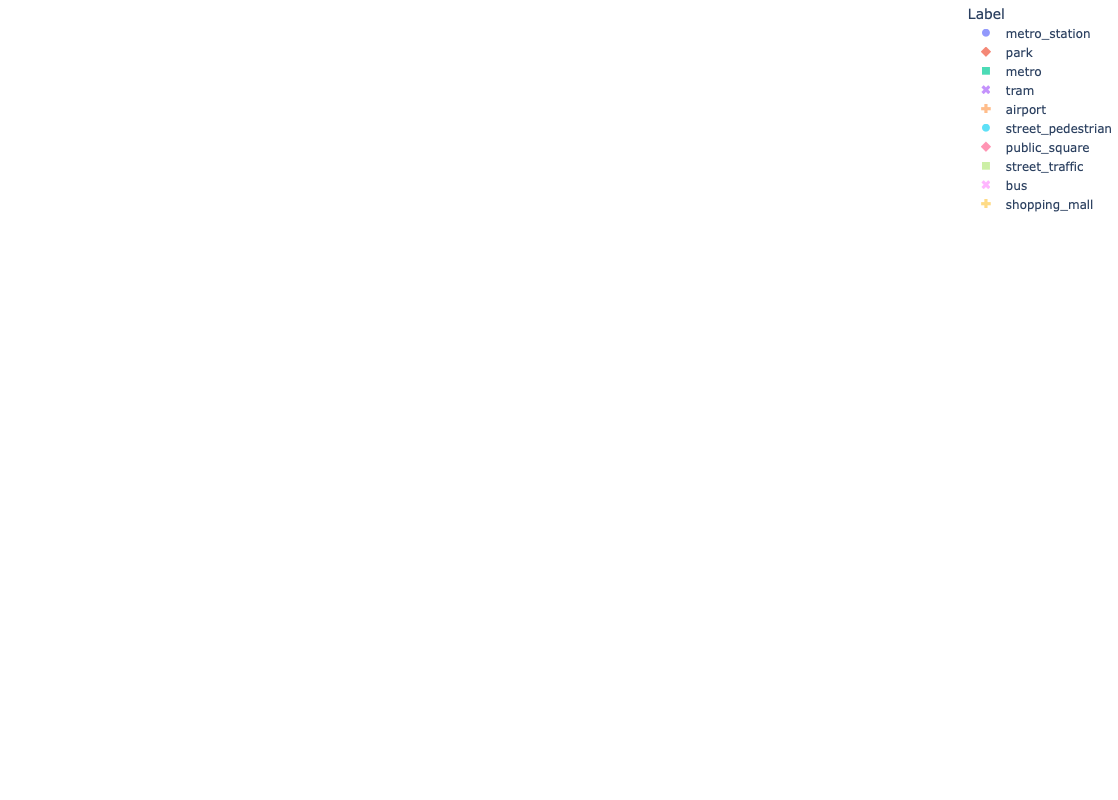

In [19]:
import plotly.express as px

# Assuming pca_df is already loaded and prepared as described
df = pca_df

# Create a 3D scatter plot
fig = px.scatter_3d(
    df,
    x='Principal Component 1',
    y='Principal Component 2',
    z='Principal Component 3',
    color='Label',  # Ensure this column exists in your dataframe
    symbol='Label',  # This will create different symbols for each label
    opacity=0.7  # Adjust opacity to ensure the plot is not too opaque
)

# Adjust layout for a tight fit in the output container
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0), # Minimize or remove margins
    width=1000,  # Set the desired width
    height=800 
    
)
fig.update_traces(
    hoverinfo='text',
    hovertext=df['Label']
)

# Display the plot
fig.show()
